In [26]:
#### IMPORTING LIBRARIES ####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [27]:
#### READ DATA ####
path = r"test1.csv "
data = pd.read_csv(path)

# DEFINE DATA

In [28]:
#### define features and target and Theta ####

### adding a new column called ones before the data only one times
data.insert(0, 'Ones', 1)   # add it because when multiply X{1,1; 1,2; 1,3} in Theta{5,10} product is[5+1*10];[5+2*10];[5+3*10]

X=np.array( data.iloc[:,:-1] )                     # X is independent variables matrix
y=np.array( data.iloc[:,-1]  ).reshape(len(X),1)   # y is  dependent  variables matrix

##define theta
shape = (len(data.axes[1])) -1 #length of columns 
theta = np.zeros(shape).reshape(shape,1) 
  
    
# data.columns=['','','','','',...]#تعريف اسماء الاعمدة 


# SHOWING DATA


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ones    70 non-null     int64  
 1   X       70 non-null     float64
 2   Y       70 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.8 KB
That's Information About My Data 
None


That's My First 5 Rows IN My Data 
   Ones        X        Y
0     1  10.9570   7.0467
1     1  13.1760  14.6920
2     1  22.2030  24.1470
3     1   5.2524  -1.2200
4     1   6.5894   5.9966


That's The Describtion Of My Data 
       Ones          X          Y
count  70.0  70.000000  70.000000
mean    1.0   8.240810   4.954765
std     0.0   3.847999   5.028818
min     1.0   5.026900  -2.680700
25%     1.0   5.713075   1.527375
50%     1.0   7.155650   4.265000
75%     1.0   9.231200   6.718825
max     1.0  22.203000  24.147000


SCATTER OF MY DATA 


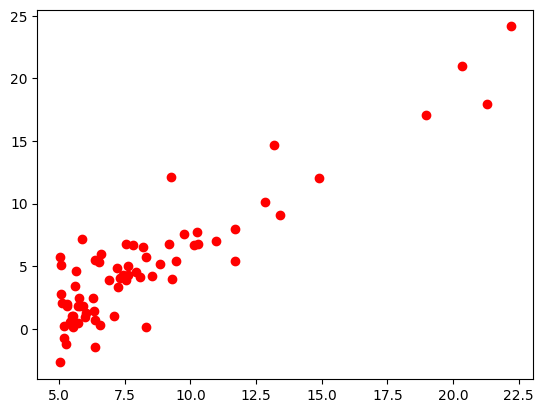

In [29]:
print(f"That's Information About My Data \n{data.info()}\n\n")

print(f"That's My First 5 Rows IN My Data \n{data.head()}\n\n")

print(f"That's The Describtion Of My Data \n{data.describe()}\n\n")

print(f"SCATTER OF MY DATA \n{plt.scatter(data.X,data.Y ,c='r' )}")

# This Step To Scalling The Data (You Can Skip It If Your Data Is OK) 

In [30]:
### Scale/normalize the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X[:,1:2])
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Normalized X:[4.49587374]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ones    70 non-null     int64  
 1   X       70 non-null     float64
 2   Y       70 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.8 KB
That's Information About My Data 
None


That's My First 5 Rows IN My Data 
   Ones        X        Y
0     1  10.9570   7.0467
1     1  13.1760  14.6920
2     1  22.2030  24.1470
3     1   5.2524  -1.2200
4     1   6.5894   5.9966


That's The Describtion Of My Data 
       Ones          X          Y
count  70.0  70.000000  70.000000
mean    1.0   8.240810   4.954765
std     0.0   3.847999   5.028818
min     1.0   5.026900  -2.680700
25%     1.0   5.713075   1.527375
50%     1.0   7.155650   4.265000
75%     1.0   9.231200   6.718825
max     1.0  22.203000  24.147000


SCATTER OF MY DATA 


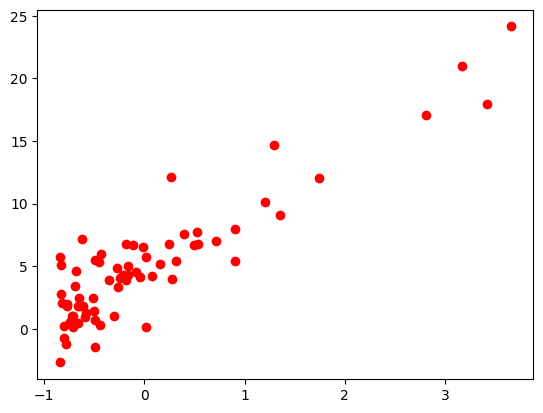

In [31]:
#### DATA SHOW After Normalization ####

print(f"That's Information About My Data \n{data.info()}\n\n")

print(f"That's My First 5 Rows IN My Data \n{data.head()}\n\n")

print(f"That's The Describtion Of My Data \n{data.describe()}\n\n")

print(f"SCATTER OF MY DATA \n{plt.scatter(X_norm,data.Y ,c='r' )}")

# -----------------------------------------------------------------------------------------------------------

# Computing Cost
The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  

In [32]:
##First Step Convert to MAtrices 
##to be able to calc in next steps

X=np.matrix(X)
y=np.matrix(y)
theta=np.matrix(theta )

In [33]:
#### COST FUNCTION ####
def computeCost(X, y, theta):
    
    f_x=(X *theta)
    
    summation=np.sum(   np.power ( (f_x -y ), 2)   ) 
    
    m=X.shape[0] # number of values
    return summation / (2 * m)

print('COST VALUE = ' , round(computeCost(X, y, theta),3))


COST VALUE =  24.739


# GradienDescent
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{2}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{3}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [34]:
#### GRADIEN DESCENT ####
def gradientDescent(X, y, theta, alpha, iters):
    global start,end
    
    start = time.time()

        
    New_Theta   = np.matrix(np.zeros(theta.shape))  # same shape of my Theta matrix
    parameters  = int(theta.ravel().shape[1])       #get how much theta that i have
    costs       = np.zeros(iters) 
    m           = len(X)
    
    for i in range(iters):
        
        error = X.dot(theta) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            New_Theta[j,0] = theta[j,0] - ((alpha / m) * np.sum(term))

            
        theta    = New_Theta
        costs[i] = computeCost(X, y, theta)
    
    end = time.time()

    return theta, costs



# initialize variables for learning rate and iterations
alpha = 0.01
iters = 2000

# perform gradient descent to "fit" the model parameters
New_theta, costs = gradientDescent(X, y, theta, alpha, iters)

def New_Theta():
    c=0
    for i in New_theta:
        print(f"Theta {c} : {round((float(i)),5)}")
        c+=1
New_Theta()

print('\nFinal Cost = ' , round(computeCost(X, y, New_theta) , 4)) # final cost
print(f"\nTIME IS : {round((end-start),4)} Sec.")

Theta 0 : -4.6579
Theta 1 : 1.16958

Final Cost =  2.2315

TIME IS : 0.2899 Sec.


# DRAWING COST FUNCTION

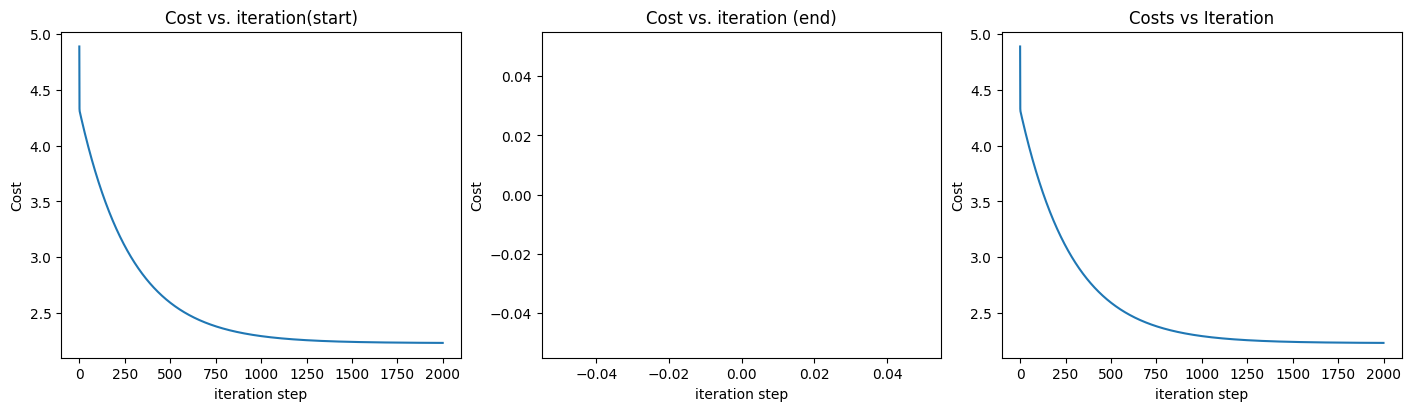

In [35]:
# plot cost versus iteration  
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, constrained_layout=True, figsize=(14,4))
ax1.plot(costs[:5000])
ax2.plot(5000 + np.arange(len(costs[5000:])), costs[5000:])
ax3.plot(costs)
##descripe shapes
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)");ax3.set_title("Costs vs Iteration")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')  ; ax3.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') ; ax3.set_xlabel('iteration step') 
plt.show()

# DRAWING BEST FIT LINE 


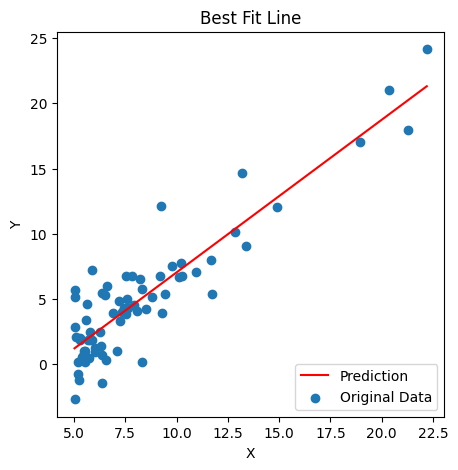

In [10]:
### BEST FIT LINE ###
feature= np.linspace(data.X.min(), data.X.max(), num=70)
Points_Best_Fit_line = ( (New_theta[0, 0]) + ( New_theta[1, 0] * feature ) ) #teta0+theta1*x

###draw the line###
fig, shape = plt.subplots(figsize=(5,5))
shape.plot(feature, Points_Best_Fit_line, 'r', label='Prediction')
shape.scatter(data.X,data.Y, label='Original Data')
shape.legend(loc=4)#place of descipetion of prdect and train data
#describ the shape
shape.set_xlabel('X')
shape.set_ylabel('Y')
shape.set_title('Best Fit Line')
plt.show()


<AxesSubplot: xlabel='X', ylabel='Y'>

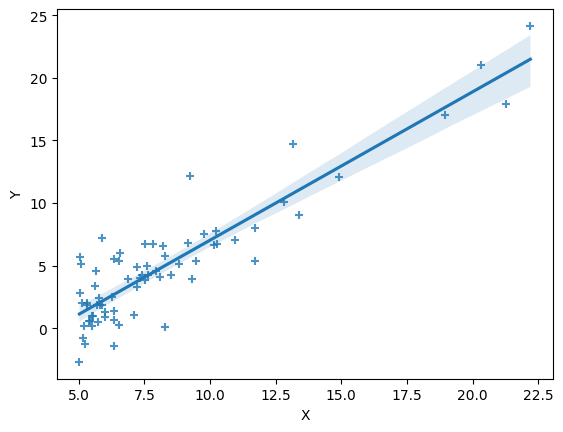

In [12]:
sns.regplot(x='X',y='Y',data=data,marker='+')

# CREATE A MODEL OF PREDECTION


#=====================================================#
Predect of 10 is :[[7.03790005]]
Predect of 15 is :[[12.88579907]]
Predect of 20 is :[[18.73369809]]
#=====================================================#


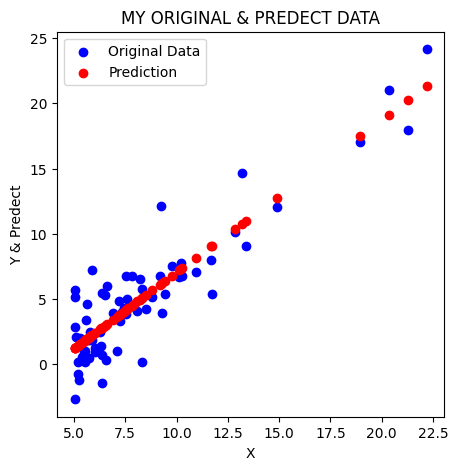

In [14]:
### MAKING MODEL ###

print("#=====================================================#")

# You can predect any value you want like 15 here 
# only put it and wait the result
print(f"Predect of 10 is :{np.dot([1,10],New_theta)}")
print(f"Predect of 15 is :{np.dot([1,15],New_theta)}")
print(f"Predect of 20 is :{np.dot([1,20],New_theta)}")

print("#=====================================================#")
### draw the Predect shape ###
Predect_Values=np.array(np.dot(X,New_theta))
fig, shape = plt.subplots(figsize=(5,5))
shape.scatter(data.X,data.Y,c='b'        , label='Original Data')
shape.scatter(data.X,Predect_Values,c='r', label='Prediction')
shape.legend(loc=0)
#describ the shape
shape.set_xlabel('X')
shape.set_ylabel('Y & Predect')
shape.set_title('MY ORIGINAL & PREDECT DATA')
plt.show()

# SCORE OF ERROR

In [18]:
# Import Libraries
from sklearn.metrics import mean_absolute_error 
#----------------------------------------------------
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(data.Y, Predect_Values) # it can be raw_values
print('Mean Absolute Error Value is : ',round(MAEValue,4))

Mean Absolute Error Value is :  1.608


In [19]:
#Import Libraries
from sklearn.metrics import mean_squared_error 
#----------------------------------------------------
#Calculating Mean Squared Error
MSEValue = mean_squared_error(data.Y, Predect_Values) # it can be raw_values
print('Mean Squared Error Value is : ',round(MSEValue,4))

Mean Squared Error Value is :  4.463


In [20]:
#Import Libraries
from sklearn.metrics import median_absolute_error
#----------------------------------------------------
#Calculating Median Squared Error
MdSEValue = median_absolute_error(data.Y, Predect_Values)
print('Median Squared Error Value is : ',round(MdSEValue,4))

Median Squared Error Value is :  1.1051


# THE END
